In [1]:
#%matplotlib inline

In [28]:
import numpy as np

from bokeh.charts import Histogram, Bar
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')

In [2]:
ebola_df = pd.read_csv("data/out/ebola_outbreaks_before_2014-geometry_fixed.csv", encoding="utf-8", index_col=False)

In [19]:
ebola_data = ebola_df.drop(ebola_df.columns[[0, 1, 2, 9]], axis=1)

#ebola_data.head()

### Data set description

In [18]:
cols = list(ebola_data.columns)

for column in cols:
    print (cols.index(column) + 1), column

1 country_code_iso_2_digits
2 country_name
3 duration_days
4 ebola_subtype
5 end_date
6 end_datetime
7 geometry
8 geometry_geojson
9 latitude
10 longitude
11 reported_number_of_deaths_among_cases
12 reported_number_of_human_cases
13 reported_of_deaths_among_cases
14 start_date
15 start_datetime
16 year_s


**=> locations info, reported cases, date/time**

### Number of outbreaks per countries

In [47]:
ebola_data.groupby(["country_name"])["country_name"].count().order()

country_name
Côte d'Ivoire (Ivory Coast)         1
England                             1
Italy                               1
South Africa                        1
Russia                              2
Philippines                         3
Sudan (South Sudan)                 3
USA                                 3
Gabon                               4
Uganda                              5
Democratic Republic of the Congo    9
Name: country_name, dtype: int64

In [68]:
# Bokeh can't seem to handle the unicode for circumflex accent on the 'o' in "Côte d'Ivoire"
# I'm replacing it by a normal 'o'

countries_list = list(ebola_data["country_name"])

for i in range(len(countries_list)): 
    if countries_list[i] == u"C\xf4te d'Ivoire (Ivory Coast)":
       countries_list[i] = u"Cote d'Ivoire (Ivory Coast)"

In [73]:
data = {
    'countries': countries_list,
    'ebola outbreaks': [1] * len(countries_list)
}

bar = Bar(data, values='ebola outbreaks', label='countries', agg='sum', color="#3B6849",
          title="Number of ebola outbreak(s) per country", plot_width=1000, plot_height=500)

#x_range = 'countries'

output_notebook()

show(bar)

Loading BokehJS ...

### The average number of days for an outbreak per country

In [8]:
ebola_data.groupby(["country_name"])["duration_days"].mean().order()

country_name
Uganda                              206.800000
Gabon                               219.750000
Democratic Republic of the Congo    235.444444
Côte d'Ivoire (Ivory Coast)         364.000000
USA                                 364.333333
Philippines                         364.666667
Sudan (South Sudan)                 364.666667
England                             365.000000
Italy                               365.000000
Russia                              365.000000
South Africa                        365.000000
Name: duration_days, dtype: float64

In [9]:
ebola_data.groupby(["country_name"])["duration_days"].std()

country_name
Côte d'Ivoire (Ivory Coast)                NaN
Democratic Republic of the Congo    128.312228
England                                    NaN
Gabon                               103.750904
Italy                                      NaN
Philippines                         364.500114
Russia                                0.000000
South Africa                               NaN
Sudan (South Sudan)                   0.577350
USA                                   0.577350
Uganda                              297.562935
Name: duration_days, dtype: float64

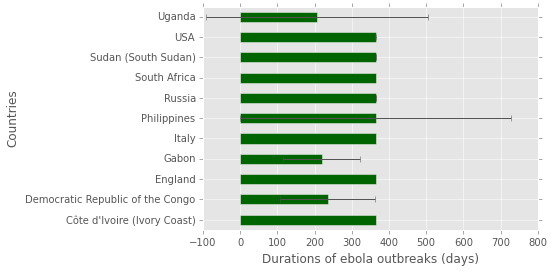

In [34]:
# The standard deviations are so variable from a country 
# to another that it looks weird on the same plot:

means = ebola_data.groupby(["country_name"])["duration_days"].mean()
errors = ebola_data.groupby(["country_name"])["duration_days"].std()
   
fig, ax = plt.subplots()
means.plot(xerr=errors, ax=ax, kind='barh', color='DarkGreen')
ax.set_ylabel('Countries')
ax.set_xlabel('Durations of ebola outbreaks (days)')

### Ebola virus subtypes

In [9]:
ebola_data[["country_name", "ebola_subtype"]].sort(["country_name"])

,country_name,ebola_subtype
30,Côte d'Ivoire (Ivory Coast),Taï Forest virus
5,Democratic Republic of the Congo,Zaire virus
6,Democratic Republic of the Congo,Zaire virus
8,Democratic Republic of the Congo,Zaire virus
10,Democratic Republic of the Congo,Zaire virus
12,Democratic Republic of the Congo,Zaire virus
15,Democratic Republic of the Congo,Bundibugyo virus
16,Democratic Republic of the Congo,Zaire virus
17,Democratic Republic of the Congo,Zaire virus
18,Democratic Republic of the Congo,Zaire virus


In [10]:
ebola_data.groupby(["ebola_subtype"])["ebola_subtype"].count().order()

ebola_subtype
Taï Forest virus     1
Bundibugyo virus     2
Reston virus         7
Sudan virus          8
Zaire virus         15
Name: ebola_subtype, dtype: int64

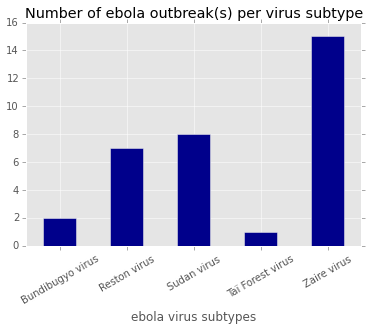

In [54]:
eb_cases_viruses = ebola_data.groupby(["ebola_subtype"])["ebola_subtype"].count()

viruses_ordered, vcounts_ordered = list(eb_cases_viruses.keys()), list(eb_cases_viruses)

e = {'ebola virus subtypes': pd.Series(viruses_ordered), 'number of ebola outbreaks': pd.Series(vcounts_ordered)}

df_viruses = pd.DataFrame(e)

df_viruses.plot(kind="bar", y="number of ebola outbreaks", x="ebola virus subtypes", color="DarkBlue",
                legend=False, rot=30, title="Number of ebola outbreak(s) per virus subtype")

### Duration of epidemy in days by virus subtype

In [11]:
ebola_data.groupby(["ebola_subtype"])["duration_days"].mean().order()

ebola_subtype
Bundibugyo virus    121.500000
Zaire virus         260.733333
Sudan virus         304.000000
Taï Forest virus    364.000000
Reston virus        364.571429
Name: duration_days, dtype: float64

__=> Bundibugyo virus seems to be correlated with shorter outbreaks__

### Human cases for DRC (country with the most cases)

In [21]:
df_drc = ebola_data[ebola_data.country_name == "Democratic Republic of the Congo"]

drc = df_drc[["ebola_subtype", "start_date", "end_date", "reported_number_of_human_cases", "reported_number_of_deaths_among_cases"]]

drc.sort(["start_date"])

,ebola_subtype,start_date,end_date,reported_number_of_human_cases,reported_number_of_deaths_among_cases
5,Zaire virus,1976-01-01T00:00:00Z,1976-12-31T00:00:00Z,318,280
8,Zaire virus,1977-01-01T00:00:00Z,1977-12-31T00:00:00Z,1,1
18,Zaire virus,1995-01-01T00:00:00Z,1995-12-31T00:00:00Z,315,250
16,Zaire virus,2001-10-01T00:00:00Z,2002-03-31T00:00:00Z,57,43
17,Zaire virus,2002-12-01T00:00:00Z,2003-04-30T00:00:00Z,143,128
10,Zaire virus,2003-11-01T00:00:00Z,2003-12-31T00:00:00Z,35,29
6,Zaire virus,2007-01-01T00:00:00Z,2007-12-31T00:00:00Z,264,187
12,Zaire virus,2008-12-01T00:00:00Z,2009-02-28T00:00:00Z,32,15
15,Bundibugyo virus,2012-06-01T00:00:00Z,2012-11-30T00:00:00Z,36,13
